Here, we will create a style sheet that you can use to help you create visualizations with consistent style and quality. First, we'll load the packages and a dataset.

In [2]:
import seaborn as sns
import warnings                         #We do this to keep from seeing lots of info junk printing out
warnings.filterwarnings('ignore')
import plotly
from matplotlib import pyplot as plt
df = sns.load_dataset('taxis');
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


We will mostly use the Seaborn library for visualization in Python. Seaborn is built on Matplotlib, so a lot of your code may use a combo of Seaborn (sns) and Matplotlib Pyplot (plt) functions. Matplotlib has a built-in style library (plt.style.use()), as does Seaborn (sns.set_style()).   

Here, we'll start out manually defining a style. Once we have one we like, we can drop the code into a mplstyle file and save it where the other style files are, so we can call it in the same way. The first thing you can do is to look at all the different style options that you can play with. This first list is for seaborn.

In [3]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

This next one is for matplotlib. You can see visual examples of matplotlib styles at https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Let's try changing some of the options above to see how the aesthetics change. First, let's look at the default plot.

<AxesSubplot: xlabel='total', ylabel='Count'>

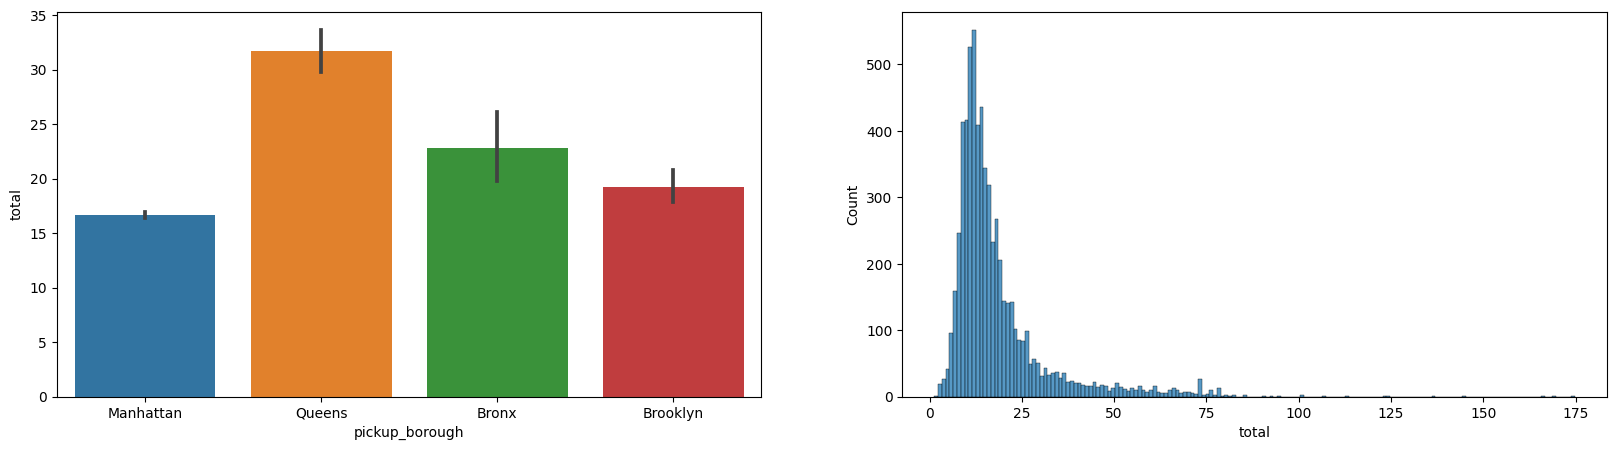

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,5))
#sns.barplot(df['pickup_borough'],df['total'], ax = ax[0])
sns.barplot(data = df, x = 'pickup_borough', y = 'total', ax = ax[0])
sns.histplot(df['total'], ax = ax[1])

Here's what I need to define my own personal styles. I can save this as a style to call from the matplotlib folder. That way, instead of all the stuff that is needed for my_rcParams() being in this file, I would just call plt.style.use(my_rcParams) in the my_styleXY function.

In [11]:
axes = {'spines.right' : False,
        'spines.left' : False,
        'grid' : True,
        'grid.axis' : 'y',
        'grid.which' : 'major',
        'titlesize' : 16,
        'titleweight' : 'bold'}
lines = {'markerfacecolor' : 'gray'}
grid = {'color' : 'black',
        'alpha' : 0.1}
figure = {'figsize' : (10,5),
          'titlesize' : 25}
font = {'font.family':'serif',
        'font.style':'italic',
        'font.weight':800}
xtick = {'labelsize' : 5}
ytick = {'labelsize' : 10}

def my_rcParams():
        plt.style.use('default')
        plt.rc('axes', **axes),
        plt.rc('grid', **grid),
        plt.rc('ytick', **ytick),
        plt.rc('figure', **figure),
        plt.rc('lines', **lines),

#You could, in theory, turn this function into a library package, just like any other that you'd install / import.        
def my_styleXY(kind, x, y, nrows, ncols, index, xtext, ytext, suptitle, title, source, highlight):
        my_rcParams()
        ax = plt.subplot(nrows, ncols, index)
        if kind == 'bar': sns.barplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'scatter': sns.scatterplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'violin': sns.violinplot(x = x, y = y, color = 'gray', ax = ax)
        ax.xaxis.set_label_text(xtext)
        ax.yaxis.set_label_text(ytext)
        heights = [p.get_height() for p in ax.patches]
        highest = sorted(heights)[len(heights)-1]
        for p in ax.patches:
                if p.get_height() == highest:
                        if highlight == "TRUE":
                                p.set_color('darkred')
        print(heights)
        fig.suptitle(suptitle, x = .15, fontsize = 16, 
                     fontstyle = 'italic', font = 'times new roman', 
                     transform = fig.transFigure, clip_on = False)
        ax.set_title(title, loc = 'left', fontsize = 12, fontstyle = 'italic', font = 'arial')
        ax.text(.04, -.01, source, transform=fig.transFigure, fontsize = 10, alpha = .7)


Once my style is developed, this is all I need to do to create consistently styled graphs

[16.670506833712984, 31.66010654490107, 22.76525252525253, 19.236240208877287]


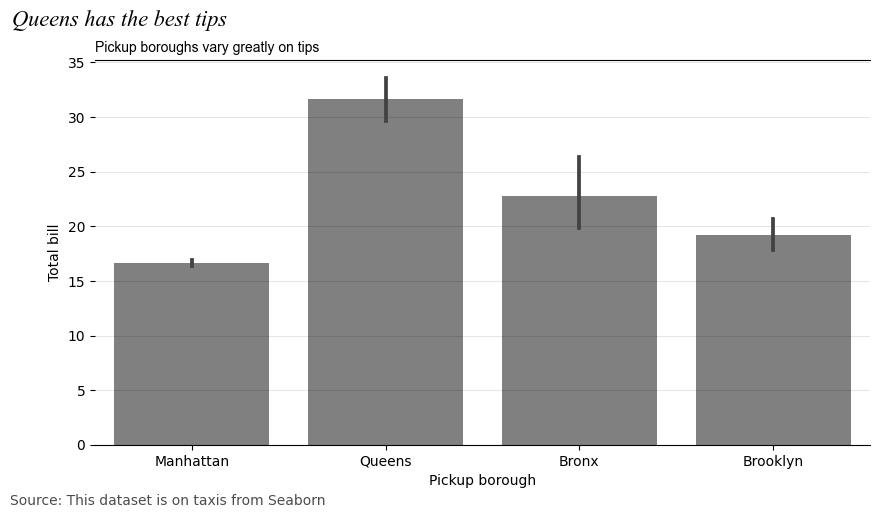

In [13]:
fig = plt.figure()

# We define my_styleXY with the following arguments: (kind (can be bar, scatter, violin), x, y, nrows (in figure), ncols (in figure), index (of subplot in figure), 
# xtext (x axis label), ytext (y axis label), suptitle (overall figure title), title (subplot title), source (where you got the data), and
# highlight (whether or not to highlight the largest value))

my_styleXY('bar', df['pickup_borough'], df['total'], 1, 1, 1, "Pickup borough",
               "Total bill","Queens has the best tips","Pickup boroughs vary greatly on tips",
               "Source: This dataset is on taxis from Seaborn", 'FALSE')

The graph above uses several principles we discussed as fundamental:

- start with gray
- readable axes labels
- main takeaway title / subtitle
- source is cited
- no lie factor
- minimal chart junk
- aligned objects (if we had stacked bars instead, we would have misaligned 'y' values)

Still, we could do better with this graph. It's a bit boring. For instance, how would you draw attention to the most notable element? How would you lead the viewer through the graph? How would you tell the story? What question does this answer?

[16.670506833712984, 31.66010654490107, 22.76525252525253, 19.236240208877287]


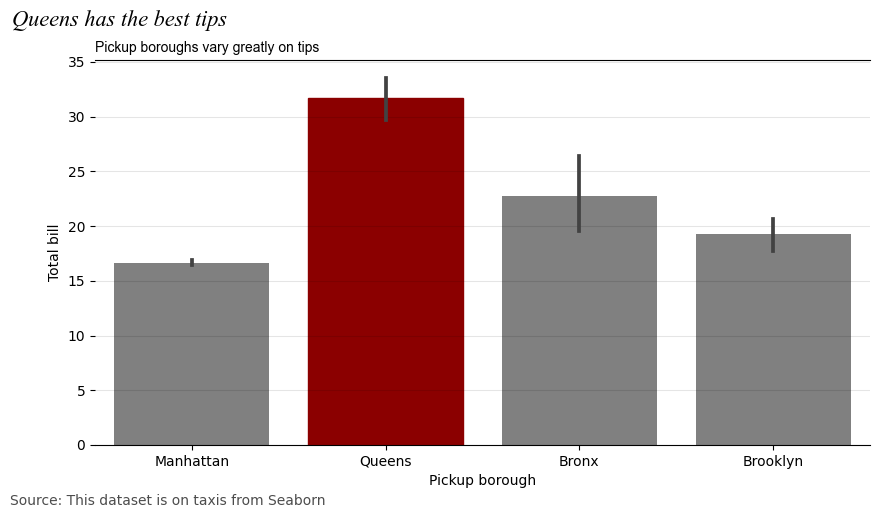

In [14]:
fig = plt.figure()

# We define my_styleXY with the following arguments: (kind (can be bar, scatter, violin), x, y, nrows (in figure), ncols (in figure), index (of subplot in figure), 
# xtext (x axis label), ytext (y axis label), suptitle (overall figure title), title (subplot title), source (where you got the data), and
# highlight (whether or not to highlight the largest value))

my_styleXY('bar', df['pickup_borough'], df['total'], 1, 1, 1, "Pickup borough",
               "Total bill","Queens has the best tips","Pickup boroughs vary greatly on tips",
               "Source: This dataset is on taxis from Seaborn", "TRUE")     #By specifying True in the last argument, we will highlight a bar.
plt.show()